# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

## Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')



### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape

(100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation:
* The dataframe has 100 rows and 6 columns
* The columns 'user_id' and 'time_spent_on_the_page' are both numbers while the remaining 4 columns are wrongly calssified as type object. 
* The 4 columsn with object data type will need to be converted to the correct data type which is categories 

In [6]:
#Convert the columns 'group','landing page', 'converted' and 'language prefered' to type category
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [7]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [8]:
df.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,new,NaN,yes,French
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


### Observations
* There are 100 user ids
* There are no missing values in the dataframe
* The time spent on the page ranges from 0.19 to 10.7 minutes with the average being 5.37 minutes
* There are 3 unique values for the 'language_prefered' column and 2 for the other categorical variables
* French is the most preferred language with a frequency of 34

### Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

In [11]:
df['user_id'].value_counts().unique

<bound method Series.unique of 546560    1
546473    1
546483    1
546482    1
546481    1
         ..
546590    1
546589    1
546588    1
546587    1
546559    1
Name: user_id, Length: 100, dtype: int64>

In [12]:
df['user_id'].value_counts().head()

546560    1
546473    1
546483    1
546482    1
546481    1
Name: user_id, dtype: int64

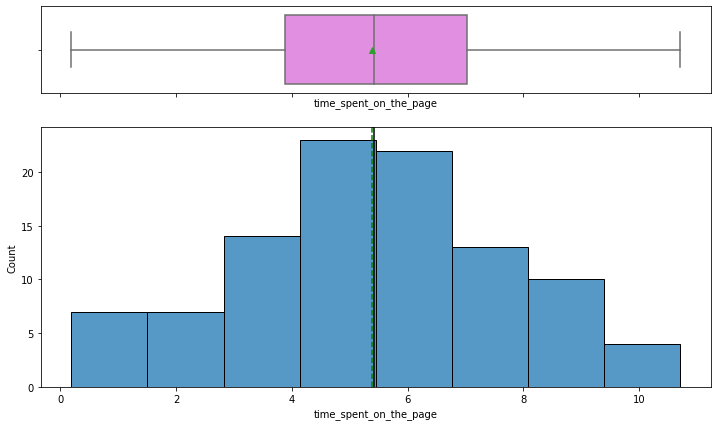

In [14]:
histogram_boxplot(df, 'time_spent_on_the_page')

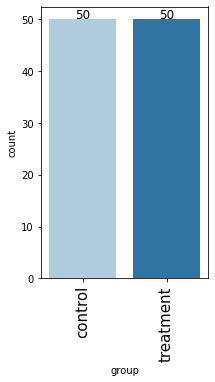

In [15]:
labeled_barplot(df, 'group')

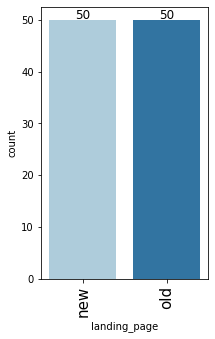

In [16]:
labeled_barplot(df, 'landing_page')

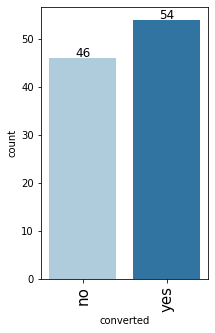

In [17]:
labeled_barplot(df, 'converted')

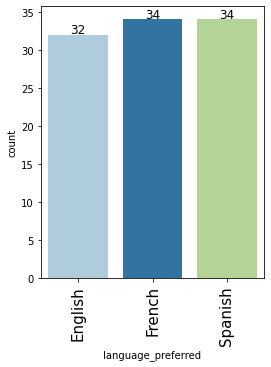

In [18]:
labeled_barplot(df, 'language_preferred')

### Observations
* There are 100 uniques users who participated in this exercise
* The time spent on the page by users generally follows a normal distribution with values ranging from 0.19 to 10.7 minutes. The average being 5.37 minutes
* The control group and treatment group both have 50 participants
* The new and old landing pages are evenly distributed to the 100 participants with each getting one landing page making it 50 old and 50 new landing pages distributed
* Of all 100 participants that were served the landing pages, 54 converted to subscriber and 46 did not
* Of all 3 languages available to view the landing pages French and Spanish are the most prefered with both gettting 34 participants each and English is the least prefered with 32 participants

### Bivariate Analysis

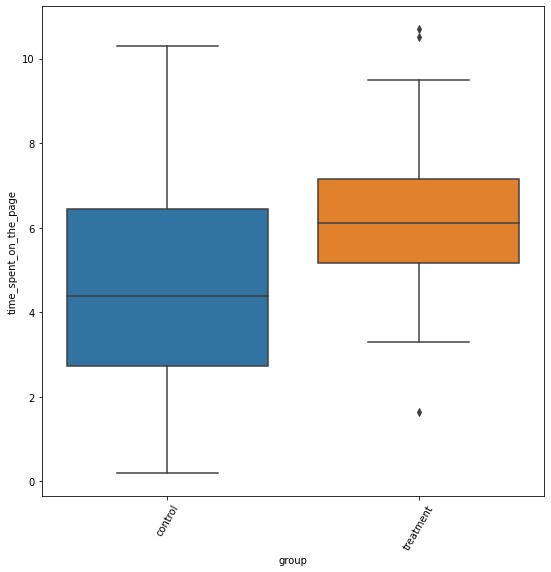

In [19]:
# Relationship between the time spent on page and the group
plt.figure(figsize=(9,9))
sns.boxplot(x='group', y='time_spent_on_the_page', data = df)
plt.xticks(rotation = 60)
plt.show()

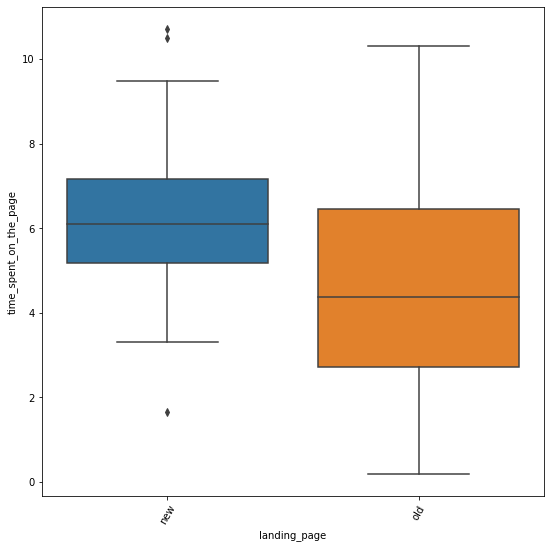

In [20]:
# Relationship between the time spent on page and the landing page
plt.figure(figsize=(9,9))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data = df)
plt.xticks(rotation = 60)
plt.show()

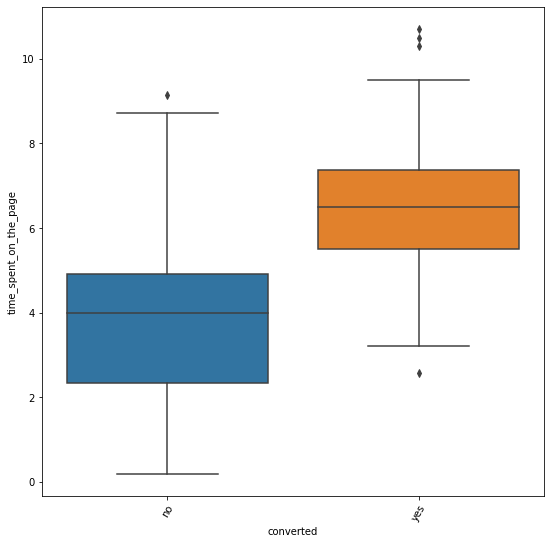

In [21]:
# Relationship between the time spent on page and the conversion by the participants
plt.figure(figsize=(9,9))
sns.boxplot(x='converted', y='time_spent_on_the_page', data = df)
plt.xticks(rotation = 60)
plt.show()

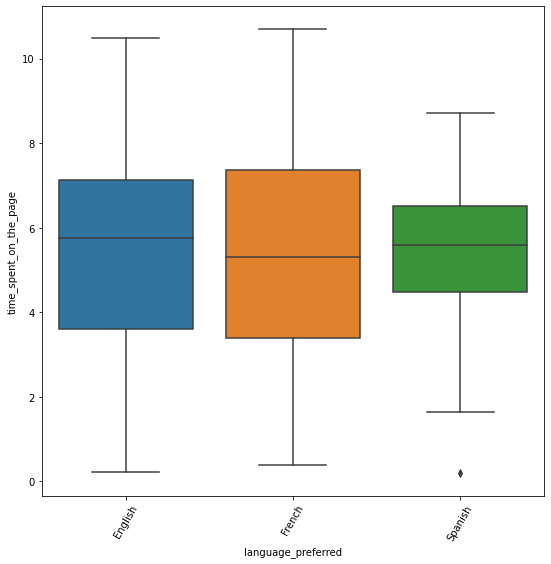

In [22]:
# Relationship between the time spent on page and the language prefered
plt.figure(figsize=(9,9))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data = df)
plt.xticks(rotation = 60)
plt.show()

### Observation
* The treatment group spent more time on their landing page than the control groups although the treatment group has outliers present on both ends
* More time was spent on the new page by participants than the old one with outliers found on both ends for the new page
* Participants who converted to subscribers spent more time on their page than participants who did not convert. Outliers are present in both but there is a higher number of outliers above 10 mins for the converted participants signifying that some participants spent much more time on the page compared to others
* The highest mean time on a page was spent by users with English as their prefered language with spanish closely behind and the least average time spent by participants that prefer French
* Spanish has some outliers nearer 0 mins suggesting possible technical issues or sudden lack of interest by some participants
* The data with outliers might be worth investigating further, for instance we might want to understand the interest of the participants who spent much more time on the pages than other particularly the converted participants

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

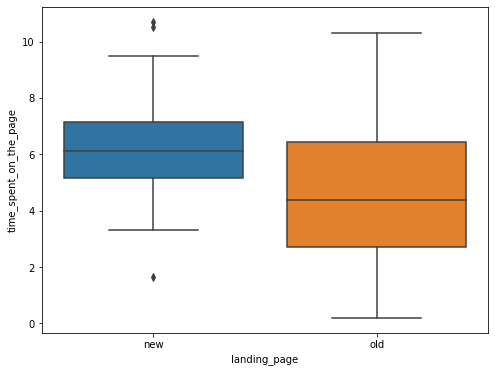

In [23]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

### Null and alternative hypothesis
* Let $\mu$Old page and $\mu$New page be the mean time spent on the old and new landing pages respectively.

* We will test the null hypothesis

* $H_0:\mu $Old page = $\mu$New page

* against the alternate hypothesis

* $H_a:\mu $Old page < $\mu$New page

In [36]:
mu = df['time_spent_on_the_page'].mean()
mu

5.377800000000002

### Step 2: Select Appropriate test

### Observations
* This is a one-tailed test concerning two population means from two independent populations. 
* The population standard deviations are unknown. 
* Based on this information, the test selected is a 2-Sample Independent T-Test.

### Step 3: Decide the significance level

We shall consider the significance level that was given which is 0.05 for this test

### Step 4: Collect and prepare data

In [25]:
# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

In [26]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The mean time spent on the new page is ' + str(time_spent_old.mean()))
print('The mean time spent on the new page is is ' + str(time_spent_new.mean()))

The sample standard deviation of the time spent on the new page is: 2.58
The sample standard deviation of the time spent on the new page is: 1.82
The mean time spent on the new page is 4.532400000000001
The mean time spent on the new page is is 6.2232


### Step 5: Calculate the p-value

In [27]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_old, time_spent_new.dropna(), equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

* The p-value (~0.00014) is much less than the level of significance

### Step 7:  Draw inference

* As the p-value (~0.00014) is much less than the level of significance, We can now reject the null hypothesis.
* This means that we now have enough evidence to support the claim that users spend more time on the new landing page than the existing one

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

<AxesSubplot:title={'center':'Conversion Rate for the Treatment Group'}>

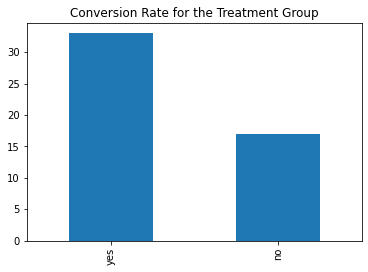

In [47]:
# visual analysis of the conversion rate for the new page and the conversion rate for the old page
df[df['group'] == 'treatment']['converted'].value_counts().plot(kind='bar', title='Conversion Rate for the Treatment Group')

<AxesSubplot:title={'center':'Conversion Rate for the Control Group'}>

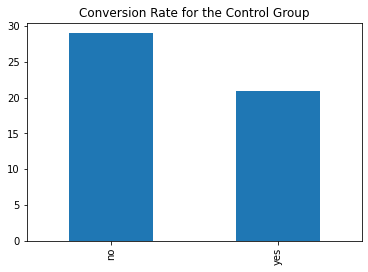

In [48]:

df[df['group'] == 'control']['converted'].value_counts().plot(kind='bar', title='Conversion Rate for the Control Group')

### Step 1: Define the null and alternate hypotheses

### Null and alternative hypothesis
* Let $p$1 and $p$2 be the conversion rate of the old and new landing pages respectively.

* We will test the null hypothesis

* $H_0:p $1 = $p$2

* against the alternate hypothesis

* $H_a:p $1 < $p$2

### Step 2: Select Appropriate test

### Observations
* This is a one-tailed test concerning two proportions the same population. 
* The population is bi-nomially distributted with only 2 possible outcomes. 
* 100 random users were selected and divided equally into 2 groups
* We can also see from the above visual that the old page which was assigned to the control group has less conversions than the new page assigned to the treatment group
* Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. 
* The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 100\cdot \frac{50}{100} =50 \geq 10\\
n(1-p_1) = 100 \cdot \frac{100-50}{100} =50 \geq 10 \\
np_2 = 100\cdot \frac{50}{100} =50 \geq 10\\
n(1-p_2) = 100 \cdot \frac{100-50}{100} =50 \geq 10 $
* Based on this information, and as this is also a test for 2 proportions the test selected is a Two-proportion z-test

### Step 3: Decide the significance level

We shall consider the significance level that was given which is 0.05 for this test

### Step 4: Collect and prepare data

In [32]:
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']


n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [33]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest   

# set the counts of converted users
conversion_count = np.array([old_converted, new_converted])

# set the sample sizes
nobs = np.array([n_control, n_treatment])
# calculate the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)

print('The p-value is', p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

The p-value (~0.016) is less than the level of significance

### Step 7:  Draw inference

* As the p-value (~0.016) is less than the level of significance, We can now reject the null hypothesis.
* This means that we now have enough evidence to support the claim that conversion rate of the old landing page is less than that of the new landing page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

In [38]:
# Creats contingency table
cont_table = pd.crosstab([df.converted], [df.language_preferred], rownames=['converted'], colnames=['language_preferred'])
cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 1: Define the null and alternate hypotheses

### Null and alternative hypothesis

* We will test the null hypothesis

* $H_0:$ Conversion and Preferred Language are independent

* against the alternate hypothesis

* $H_a:$ Conversion and Preferred Language are not independent

### Step 2: Select Appropriate test

### Observations
* Both are Categorical variables
* Both were randomly selected from the population
* Expected value of the number of sample observations in each level of the variable is greater than 5 as can be see in the above table
* Based on this information the chosen test will be the Chi-square test of independence

### Step 3: Decide the significance level

We shall consider the significance level that was given which is 0.05 for this test

### Step 4: Collect and prepare data

In [39]:
# The contingency table created above will be used for the test
cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [40]:
# Import the required function
from scipy.stats import chi2_contingency  

# Code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(cont_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with  𝛼 

The p-value (~0.213) is greater than the level of significance

### Step 7: Draw inference

* As the p-value (~0.213) is greater than the level of significance, We are unable to reject the null hypothesis.
* This means that we do not have enough evidence to support the claim that Conversion and Preferred Language are not independent

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

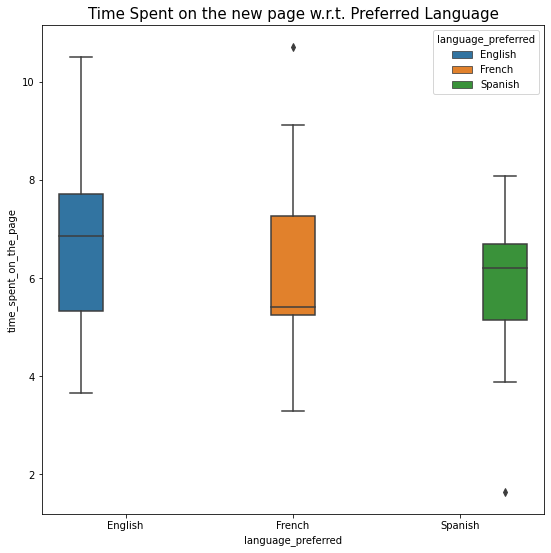

In [41]:
# visual analysis of the time spent on the new page for the different languages
time_NL = df[df['landing_page'] == 'new']
plt.figure(figsize=(9,9))
a = sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data = time_NL, hue = 'language_preferred' )
a.set_title("Time Spent on the new page w.r.t. Preferred Language", fontsize=15)
plt.show()

In [42]:
# Calculate mean time spent on page for all 3 languages
time_NL['time_spent_on_the_page'].groupby(time_NL['language_preferred']).mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page  for the prefered languages English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ The time spent on the new page for at least one of the preferred languages is different from the rest.


### Step 2: Select Appropriate test

* This is a problem, concerning three population means. 
* Based on this information, the appropriate test to compare the three population means is the One way ANOVA F-Test. 
* I will now also, check the assumptions of normality and equality of variance for the three groups by using the Shapiro-Wilk’s test and Levene tests respectively

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [43]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(time_NL['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large compared to the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [44]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( time_NL[time_NL['language_preferred']=="English"]['time_spent_on_the_page'], 
                             time_NL[time_NL['language_preferred']=="French"]['time_spent_on_the_page'], 
                             time_NL[time_NL['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

We will use the significance level given in the problem statement which is, α = 0.05.

### Step 4: Collect and prepare data

In [45]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = time_NL[time_NL['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French language users
time_spent_French = time_NL[time_NL['language_preferred']=="French"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by Spanish language users
time_spent_Spanish = time_NL[time_NL['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [46]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value =    f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

### Insight
* The p-value is greater than the significance level

### Step 7:  Draw inference

* As the p-value is greater than the significance level, we are unable to reject the null hypothesis. 
* We therefore do not have enough statistical significance to conclude that the time spent on the new page for at least one of the preferred languages is different from the rest at 5% significance level.

## Conclusion and Business Recommendations

#### Findings from Exploratory Analysis
* The time spent on the page ranges from 0.19 to 10.7 minutes with the average being 5.37 minutes
* French is the most preferred language with a frequency of 34 while English is the least
* The time spent on the page is normally distributed
* Total percentage of user converted is 54% for both pages
* The treatment group spent more time on average on their page
* More time was spent by users on the new page
* Most users who were converted spent more time on the page
* Users who prefer the French Language spent less time on average on their page than users who prefer Spanish or English

#### Findings from Statistical Analysis
* We now have enough evidence to support the claim that users spend more time on the new landing page than the existing one
* we now have enough evidence to support the claim that the conversion rate of the old landing page is less than that of the new landing page.
* we do not have enough evidence to support the claim that Conversion and Preferred Language are not independent
* We do not have enough statistical significance to conclude that the time spent on the new page for at least one of the preferred languages is different from the rest at 5% significance level.

#### Conclusion
* Based on the above results from the completed statistical analysis I would conclude that the new page is indeed effective enough to gather new subscribers for the news portal considering the fact that users spend more time on it and it has a higher conversion rate than the old page. We can maintain the current prefered languages for users since the conversion rate is not dependent on this. We also do not need to take any action with regards improving the page design for the various prefered languages to improve conversion rate for the new page as we can see that there is no material difference in time spent for the 3 prefered languaged on the new page.